In [1]:
import pandas as pd
%pip install matplotlib
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



READ AS CSV

In [2]:
high=pd.read_csv("tool health - high quality .csv")
medium=pd.read_csv("tool health - Medium quality.csv")
low=pd.read_csv("tool health - Low quality.csv")

CHECK NUMBER OF SAMPLES FOR EACH CLASS IS EQUAL

In [3]:
print("Number of sample for high quality tools:", len(high))
print("Number of sample for medium quality tools:", len(medium))
print("Number of sample for low quality tools:", len(low))
if(len(low)==len(high) and len(high)==len(medium)):
    print("Data is consistent")
else:
    print("Data is inconsistent")

Number of sample for high quality tools: 154
Number of sample for medium quality tools: 120
Number of sample for low quality tools: 136
Data is inconsistent


ADDING TARGET COLUMN 'QUALITY' TO EACH DATASET

In [5]:
low_label=['low']*len(low)
medium_label=['medium']*len(medium)
high_label=['high']*len(high)
low['Quality']=low_label
medium['Quality']=medium_label
high['Quality']=high_label

CONCATENATING ALL THREE DATAFRAMES

In [6]:
dfs=[low,medium,high]
undersample_concantenated_df=pd.concat([df.sample(frac=1) for df in dfs], ignore_index=True)

RANDOM SHUFFLING OF IMBALANCED DATASET

In [7]:
undersample_concantenated_df=undersample_concantenated_df.sample(frac=1).reset_index(drop=True)

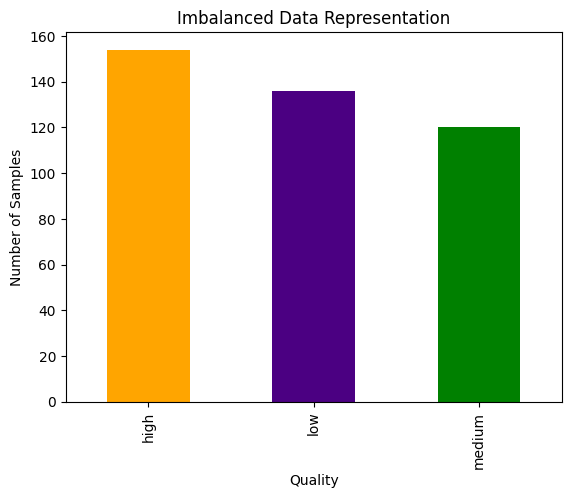

In [8]:
import matplotlib.pyplot as plt
colors=['orange','indigo','green']
label_counts =undersample_concantenated_df['Quality'].value_counts()
label_counts.plot(kind='bar',color=colors)

# Adding titles and labels
plt.title('Imbalanced Data Representation')
plt.xlabel('Quality')
plt.ylabel('Number of Samples')

# Display the plot
plt.show()

Re-Sampling Imbalanced Dataset Using SMOTE Technique 

In [9]:
from imblearn.over_sampling import SMOTE
X = undersample_concantenated_df.drop('Quality', axis=1)
y = undersample_concantenated_df['Quality']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new dataframe with the resampled data
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Quality'] = y_resampled

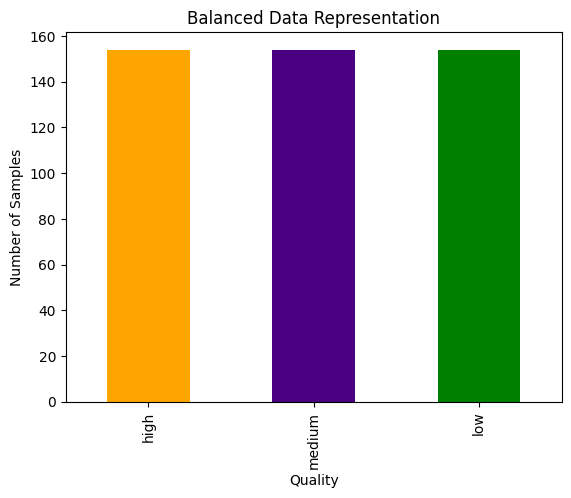

In [10]:
label_counts =resampled_df['Quality'].value_counts()
label_counts.plot(kind='bar',color=colors)

# Adding titles and labels
plt.title('Balanced Data Representation')
plt.xlabel('Quality')
plt.ylabel('Number of Samples')

# Display the plot
plt.show()

SAVE BOTH BALANCED AND IMBALANCED DATAFRAME TO CSV

In [39]:
resampled_df.to_csv('resampled_concatenated_df.csv', index=False)
undersample_concantenated_df.to_csv('undersample_concantenated_df.csv',index=False)

FINAL DATASET AFTER SHUFFLING ROWS RANDOMLY 

In [41]:
final_concantenated_df=resampled_df.sample(frac=1).reset_index(drop=True)
final_concantenated_df.to_csv('final_data.csv', index=False)